In [1]:
from pprint import pprint
import networkx as nx
import pyreason as pr
import matplotlib.pyplot as plt

## Customers


In [2]:
customers = ['John', 'Mary', 'Justin', 'Alice', 'Bob', 'Eva', 'Mike']

customer_details = [
    ('John', 'M', 'New York', 'NY'),
    ('Mary', 'F', 'Los Angeles', 'CA'),
    ('Justin', 'M', 'Chicago', 'IL'),
    ('Alice', 'F', 'Houston', 'TX'),
    ('Bob', 'M', 'Phoenix', 'AZ'),
    ('Eva', 'F', 'San Diego', 'CA'),
    ('Mike', 'M', 'Dallas', 'TX')
]
customer_dict = {i: customer for i, customer in enumerate(customer_details)}

customer_dict

{0: ('John', 'M', 'New York', 'NY'),
 1: ('Mary', 'F', 'Los Angeles', 'CA'),
 2: ('Justin', 'M', 'Chicago', 'IL'),
 3: ('Alice', 'F', 'Houston', 'TX'),
 4: ('Bob', 'M', 'Phoenix', 'AZ'),
 5: ('Eva', 'F', 'San Diego', 'CA'),
 6: ('Mike', 'M', 'Dallas', 'TX')}

## Pets

In [3]:
# Pets
pet_details = [
    ('Dog', 'Mammal'),
    ('Cat', 'Mammal'),
    ('Rabbit', 'Mammal'),
    ('Parrot', 'Bird'),
    ('Fish', 'Fish')
]
pet_dict = {i: pet for i, pet in enumerate(pet_details)}
pet_dict

{0: ('Dog', 'Mammal'),
 1: ('Cat', 'Mammal'),
 2: ('Rabbit', 'Mammal'),
 3: ('Parrot', 'Bird'),
 4: ('Fish', 'Fish')}

## Cars

In [4]:
# Separate lists for car models and colors

car_details = [
    ('Toyota Camry', 'Red'),
    ('Honda Civic', 'Blue'),
    ('Ford Focus', 'Red'),
    ('BMW 3 Series', 'Black'),
    ('Tesla Model S', 'Red'),
    ('Chevrolet Bolt EV', 'White'),
    ('Ford Mustang', 'Yellow'),
    ('Audi A4', 'Silver'),
    ('Mercedes-Benz C-Class', 'Grey'),
    ('Subaru Outback', 'Green'),
    ('Volkswagen Golf', 'Blue'),
    ('Porsche 911', 'Black')
]

car_dict = {i: car for i, car in enumerate(car_details)}
car_dict

{0: ('Toyota Camry', 'Red'),
 1: ('Honda Civic', 'Blue'),
 2: ('Ford Focus', 'Red'),
 3: ('BMW 3 Series', 'Black'),
 4: ('Tesla Model S', 'Red'),
 5: ('Chevrolet Bolt EV', 'White'),
 6: ('Ford Mustang', 'Yellow'),
 7: ('Audi A4', 'Silver'),
 8: ('Mercedes-Benz C-Class', 'Grey'),
 9: ('Subaru Outback', 'Green'),
 10: ('Volkswagen Golf', 'Blue'),
 11: ('Porsche 911', 'Black')}

##  Travels

In [5]:
travels = [
    ('John', 'Los Angeles', 'CA', 'New York', 'NY', 2),
    ('Alice', 'Houston', 'TX', 'Phoenix', 'AZ', 5),
    ('Eva', 'San Diego', 'CA', 'Dallas', 'TX', 1),
    ('Mike', 'Dallas', 'TX', 'Chicago', 'IL', 3)
]

## Friendships, Car ownerships, and Pet ownerships

In [6]:
friendships = [('customer_2', 'customer_1'), ('customer_0', 'customer_1'), ('customer_0', 'customer_2'),
               ('customer_3', 'customer_4'), ('customer_4', 'customer_0'), ('customer_5', 'customer_3'),
               ('customer_6', 'customer_0'), ('customer_5', 'customer_6'), ('customer_4', 'customer_5'),
               ('customer_3', 'customer_1')]
car_ownerships = [('customer_1', 'Car_0'), ('customer_2', 'Car_1'), ('customer_0', 'Car_2'), ('customer_3', 'Car_3'),
                  ('customer_4', 'Car_4'), ('customer_3', 'Car_0'), ('customer_2', 'Car_3'), ('customer_5', 'Car_5'),
                  ('customer_6', 'Car_6'), ('customer_0', 'Car_7'), ('customer_1', 'Car_8'), ('customer_4', 'Car_9'),
                  ('customer_3', 'Car_10'), ('customer_2', 'Car_11'), ('customer_5', 'Car_2'), ('customer_6', 'Car_4')]

pet_ownerships = [('customer_1', 'Pet_1'), ('customer_2', 'Pet_1'), ('customer_2', 'Pet_0'), ('customer_0', 'Pet_0'),
                  ('customer_3', 'Pet_2'), ('customer_4', 'Pet_2'), ('customer_5', 'Pet_3'), ('customer_6', 'Pet_4'),
                  ('customer_0', 'Pet_4')]

## Creating the Nodes

In [7]:
g = nx.DiGraph()

for customer_id, details in customer_dict.items():
    attributes = {
        'c_id': customer_id,
        'name': details[0],
        'gender': details[1],
        'city': details[2],
        'state': details[3],
    }
    name = "customer_" + str(customer_id)
    g.add_node(name, **attributes)

for pet_id, details in pet_dict.items():
    dynamic_attribute=f"Pet_{pet_id}"
    attributes = {
        'pet_id': pet_id,
        'species': details[0],
        'class': details[1],
        dynamic_attribute: 1
    }
    name = "Pet_" + str(pet_id)
    g.add_node(name, **attributes)

for car_id, details in car_dict.items():
    dynamic_attribute=f"Car_{car_id}"
    attributes = {
        'car_id': car_id,
        'model': details[0],
        'color': details[1],
        dynamic_attribute: 1
    }
    name = "Car_" + str(car_id)
    g.add_node(name, **attributes)


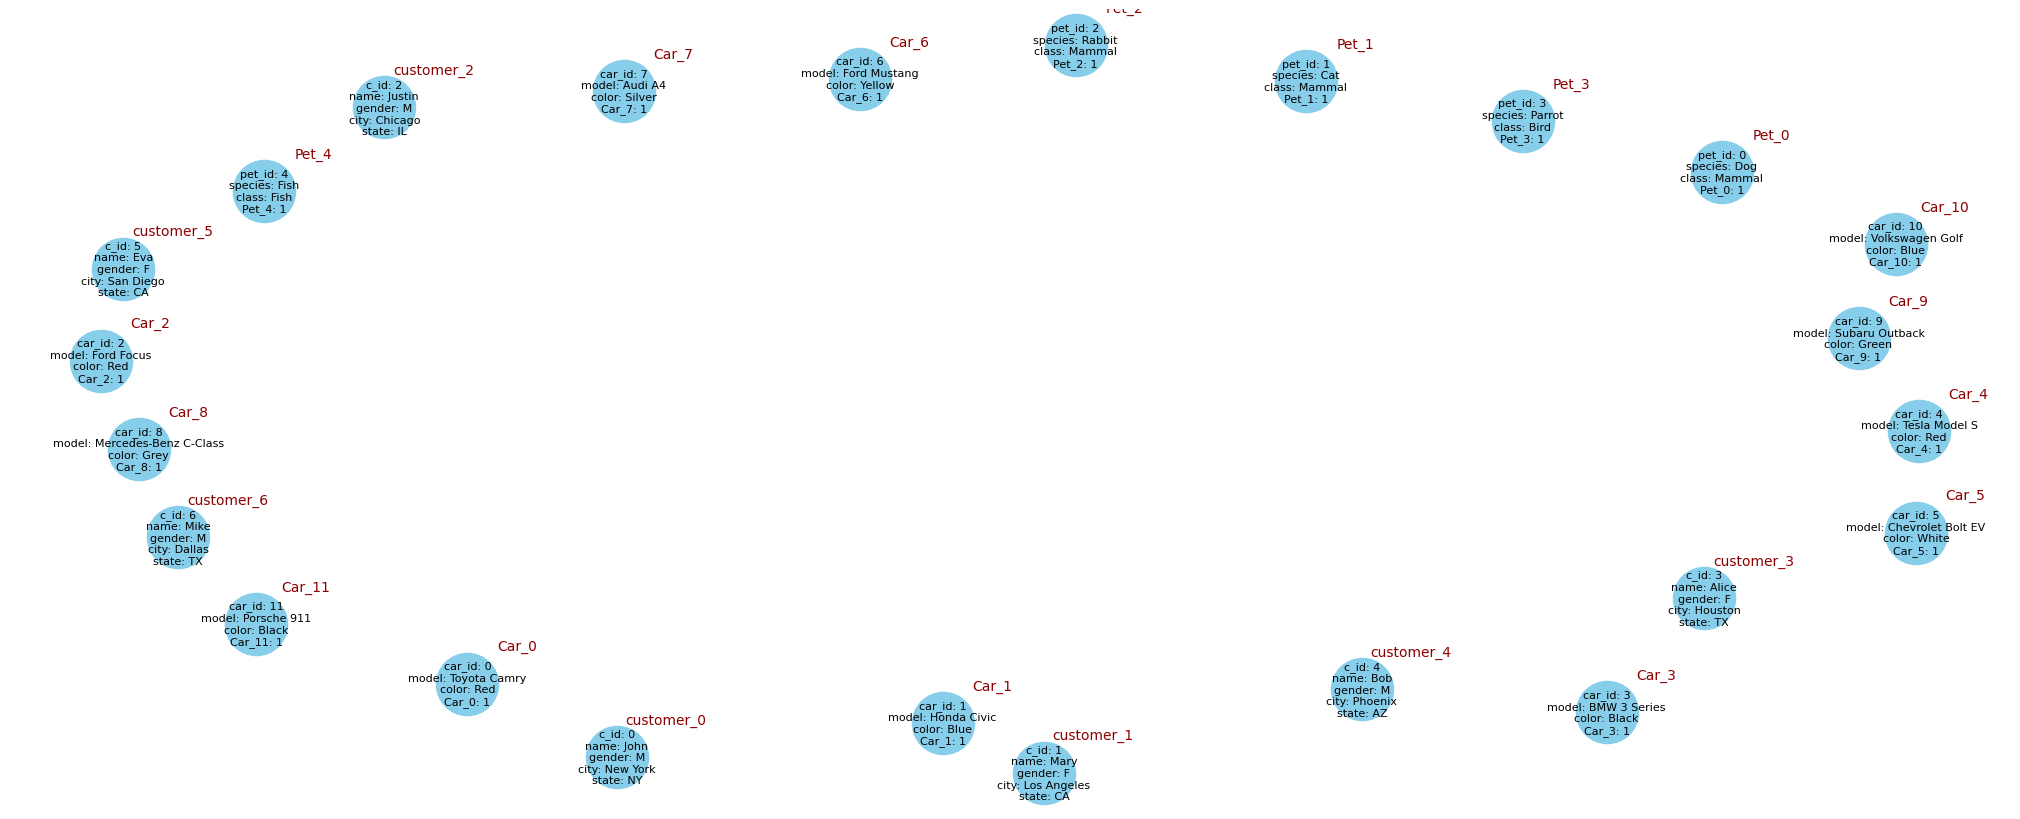

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Draw the graph with nodes and edges
plt.figure(figsize=(20, 8))
pos = nx.spring_layout(g)  # Position nodes using spring layout

# Draw the nodes and edges
nx.draw(g, pos, with_labels=False, node_size=2000, node_color='skyblue', 
        font_size=10, font_weight='bold', arrows=True)

# Separate node names (primary labels) and attributes
node_names = {n: n for n in g.nodes}  # Node names as labels
node_attrs = {n: "\n".join([f"{k}: {v}" for k, v in g.nodes[n].items()]) for n in g.nodes}

# Adjust label positions slightly above/below the nodes
offset_pos = {node: (x + 0.05, y + 0.1) for node, (x, y) in pos.items()}  # Shift names upward

# Draw the node names outside the circles
nx.draw_networkx_labels(g, offset_pos, labels=node_names, font_size=10, font_color='darkred')

# Draw the other attributes inside the nodes
nx.draw_networkx_labels(g, pos, labels=node_attrs, font_size=8)

# Display the graph
plt.show()

## Creating the Edges

In [9]:
for f1, f2 in friendships:
    g.add_edge(f1, f2, Friends=1)
for owner, car in car_ownerships:
    g.add_edge(owner, car, owns_car=1, car_color_id=int(car.split('_')[1]))
for owner, pet in pet_ownerships:
    g.add_edge(owner, pet, owns_pet=1)


In [10]:
pr.load_graph(g)

pr.settings.verbose = True
pr.settings.atom_trace = True

pr.add_rule(pr.Rule('popular(x) <-1 popular(y), Friends(x,y)', 'popular_pet_rule'))
pr.add_rule(pr.Rule('cool_car(x) <-1 owns_car(x,y),Car_4(y)', 'cool_car_rule'))
pr.add_rule(pr.Rule('cool_pet(x)<-1 owns_pet(x,y),Pet_2(y)', 'cool_pet_rule'))
pr.add_rule(pr.Rule('trendy(x) <- cool_car(x) , cool_pet(x)', 'trendy_rule'))

pr.add_rule(
    pr.Rule("car_friend(x,y) <- owns_car(x,z), owns_car(y,z) , c_id(x) != c_id(y) ", "car_friend_rule",infer_edges=True))
pr.add_rule(
    pr.Rule("same_color_car(x, y) <- owns_car(x, c1) , owns_car(y, c2),  car_color_id(x,c1) == car_color_id(y,c2) , c_id(x) != c_id(y)",
            "same_car_color_rule"))

pr.add_fact(pr.Fact(name='popular-fact', component='customer_0', attribute='popular', bound=[1, 1],start_time=0,end_time=20))

In [11]:
interpretation = pr.reason(timesteps=5)
# pr.save_rule_trace(interpretation)

Timestep: 0
Timestep: 1
Timestep: 2
Timestep: 3
Timestep: 4
Timestep: 5
Fixed Point iterations: 13


In [12]:
interpretations_dict = interpretation.get_interpretation_dict()
print(interpretations_dict)

df1 = pr.filter_and_sort_nodes(interpretation, ['trendy', 'cool_car', 'cool_pet', 'popular'])
df2 = pr.filter_and_sort_edges(interpretation, ['car_friend', 'same_color_car'])


{0: {'customer_0': {'popular': (1.0, 1.0)}, 'customer_1': {}, 'customer_2': {}, 'customer_3': {}, 'customer_4': {}, 'customer_5': {}, 'customer_6': {}, 'Pet_0': {}, 'Pet_1': {}, 'Pet_2': {}, 'Pet_3': {}, 'Pet_4': {}, 'Car_0': {}, 'Car_1': {}, 'Car_2': {}, 'Car_3': {}, 'Car_4': {}, 'Car_5': {}, 'Car_6': {}, 'Car_7': {}, 'Car_8': {}, 'Car_9': {}, 'Car_10': {}, 'Car_11': {}, ('customer_0', 'customer_1'): {}, ('customer_0', 'customer_2'): {}, ('customer_0', 'Car_2'): {}, ('customer_0', 'Car_7'): {}, ('customer_0', 'Pet_0'): {}, ('customer_0', 'Pet_4'): {}, ('customer_1', 'Car_0'): {}, ('customer_1', 'Car_8'): {}, ('customer_1', 'Pet_1'): {}, ('customer_2', 'customer_1'): {}, ('customer_2', 'Car_1'): {}, ('customer_2', 'Car_3'): {}, ('customer_2', 'Car_11'): {}, ('customer_2', 'Pet_1'): {}, ('customer_2', 'Pet_0'): {}, ('customer_3', 'customer_4'): {}, ('customer_3', 'customer_1'): {}, ('customer_3', 'Car_3'): {}, ('customer_3', 'Car_0'): {}, ('customer_3', 'Car_10'): {}, ('customer_3', 'Pe

In [13]:
df1

[    component  trendy cool_car    cool_pet popular
 0  customer_0  [0, 1]   [0, 1]  [1.0, 1.0]  [0, 1],
     component      trendy    cool_car    cool_pet     popular
 0  customer_0      [0, 1]      [0, 1]      [0, 1]  [1.0, 1.0]
 1  customer_4  [1.0, 1.0]  [1.0, 1.0]  [1.0, 1.0]  [1.0, 1.0]
 2  customer_6      [0, 1]  [1.0, 1.0]      [0, 1]  [1.0, 1.0]
 3  customer_3      [0, 1]      [0, 1]  [1.0, 1.0]      [0, 1],
     component      trendy    cool_car    cool_pet     popular
 0  customer_0      [0, 1]      [0, 1]      [0, 1]  [1.0, 1.0]
 1  customer_3      [0, 1]      [0, 1]  [1.0, 1.0]  [1.0, 1.0]
 2  customer_4  [1.0, 1.0]  [1.0, 1.0]  [1.0, 1.0]  [1.0, 1.0]
 3  customer_5      [0, 1]      [0, 1]      [0, 1]  [1.0, 1.0]
 4  customer_6      [0, 1]  [1.0, 1.0]      [0, 1]  [1.0, 1.0],
     component      trendy    cool_car    cool_pet     popular
 0  customer_0      [0, 1]      [0, 1]      [0, 1]  [1.0, 1.0]
 1  customer_3      [0, 1]      [0, 1]  [1.0, 1.0]  [1.0, 1.0]
 2  custome

In [14]:
df2

[                  component  car_friend same_color_car
 0  (customer_2, customer_3)  [1.0, 1.0]     [1.0, 1.0]
 1  (customer_2, customer_2)  [1.0, 1.0]         [0, 1]
 2  (customer_3, customer_2)  [1.0, 1.0]     [1.0, 1.0]
 3  (customer_3, customer_3)  [1.0, 1.0]         [0, 1]
 4  (customer_4, customer_6)  [1.0, 1.0]     [1.0, 1.0]
 5  (customer_4, customer_4)  [1.0, 1.0]         [0, 1]
 6  (customer_6, customer_4)  [1.0, 1.0]     [1.0, 1.0]
 7  (customer_6, customer_6)  [1.0, 1.0]         [0, 1],
                   component  car_friend same_color_car
 0  (customer_2, customer_3)  [1.0, 1.0]     [1.0, 1.0]
 1  (customer_2, customer_2)  [1.0, 1.0]         [0, 1]
 2  (customer_3, customer_2)  [1.0, 1.0]     [1.0, 1.0]
 3  (customer_3, customer_3)  [1.0, 1.0]         [0, 1]
 4  (customer_4, customer_6)  [1.0, 1.0]     [1.0, 1.0]
 5  (customer_4, customer_4)  [1.0, 1.0]         [0, 1]
 6  (customer_6, customer_4)  [1.0, 1.0]     [1.0, 1.0]
 7  (customer_6, customer_6)  [1.0, 1.0]       